## **SVD(Singular Value Decomposition) 특이값 분해**

> SVD에서 Sigma 행렬을 계산하는 방법

- SVD(Singular Value Decomposition)에서 sigma 행렬은 대각 성분이 특이값(singular value)인 대각 행렬입니다. 특이값은 원본 행렬의 고유값(eigenvalue)과 유사한 개념으로, 데이터의 중요성이나 분산을 나타냅니다.

- ### **< sigma 행렬을 계산하는 방법 >**
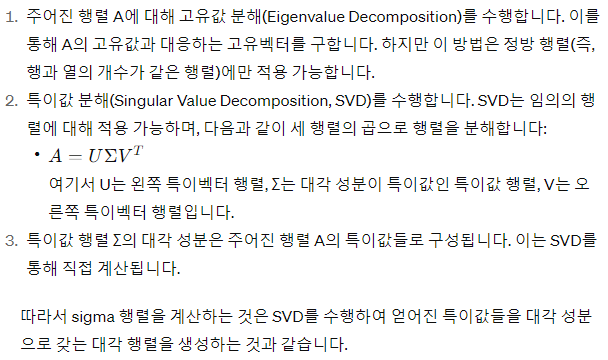

> 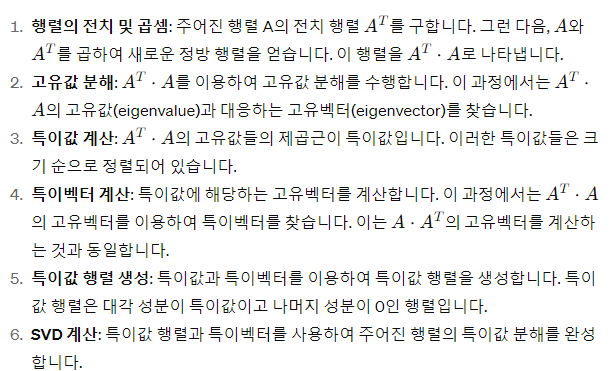

> 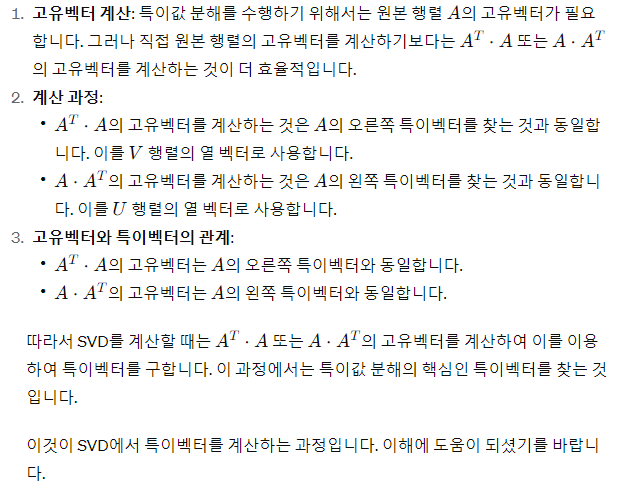

- Pca는 정방행렬만을 고유벡터로 분해할 수 있지만, SVD는 정방행렬 뿐만 아니라 행과 열의 크기가 다른 행렬에도 적용 가능한 특징이 있다.

> 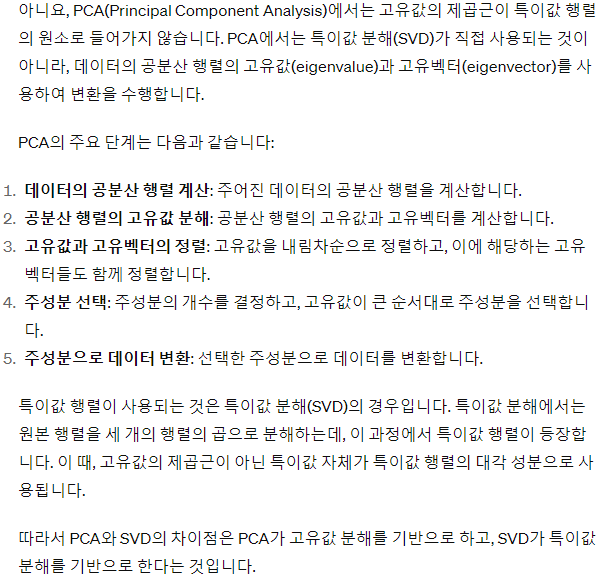

- Truncated SVD : 시그마 행렬의 대각 원소 중 상위 몇 개 만을 추출해서 여기에 대응하는 U와 V의 원소도 함께 제거해 더욱 차원을 줄인 형태로 분해하는 것.

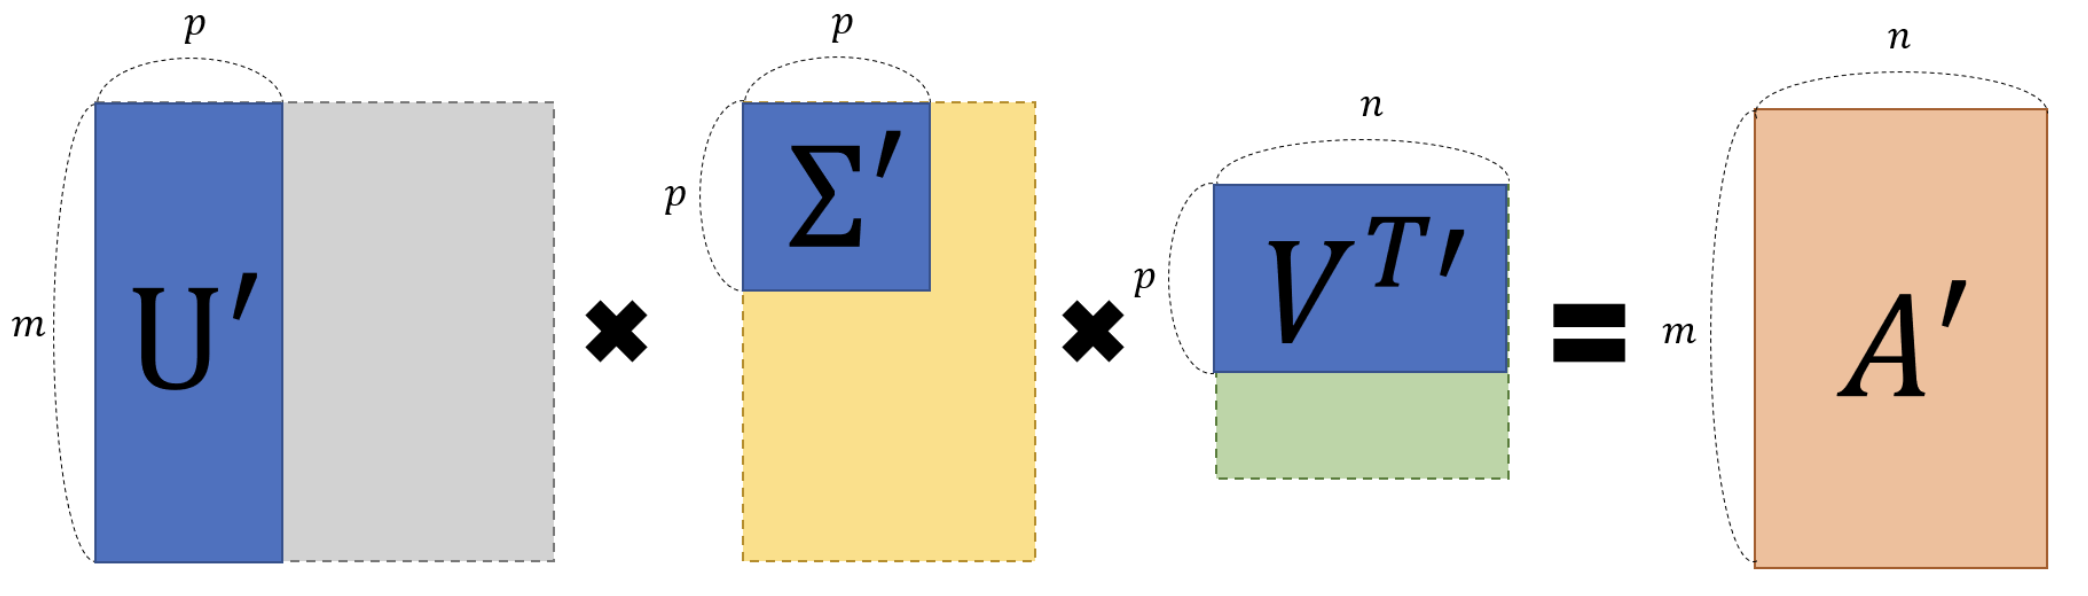

> Numpy의 SVD module인 numpy.linalg.svd를 통해 svd 연산

In [27]:
import numpy as np
from numpy.linalg import svd

np.random.seed(121)
a = np.random.randn(4,4)
print(np.round(a,3))
# 행렬의 개별 row끼리의 의존성을 없애기 위해 random 행렬 생성

[[-0.212 -0.285 -0.574 -0.44 ]
 [-0.33   1.184  1.615  0.367]
 [-0.014  0.63   1.71  -1.327]
 [ 0.402 -0.191  1.404 -1.969]]


> numpy.linalg.svd에 파라미터로 원본 행렬을 입력하면 U행렬, Sigma 행렬, V 전치 행렬을 반환

- 이때 Sigma 행렬의 경우 행렬의 대각에 위치한 값만 0이 아니고, 그렇지 않은 경우는 모두 0이므로 0이 아닌 값의 경우만 1차원 행렬로 표현

In [28]:
U, Sigma, Vt = svd(a)
print(U.shape, Sigma.shape, Vt.shape)
print('U matrix:\n',np.round(U, 3))
print('Sigma Value:\n',np.round(Sigma, 3))
print('V transpose matrix:\n',np.round(Vt, 3))

(4, 4) (4,) (4, 4)
U matrix:
 [[-0.079 -0.318  0.867  0.376]
 [ 0.383  0.787  0.12   0.469]
 [ 0.656  0.022  0.357 -0.664]
 [ 0.645 -0.529 -0.328  0.444]]
Sigma Value:
 [3.423 2.023 0.463 0.079]
V transpose matrix:
 [[ 0.041  0.224  0.786 -0.574]
 [-0.2    0.562  0.37   0.712]
 [-0.778  0.395 -0.333 -0.357]
 [-0.593 -0.692  0.366  0.189]]


- 이렇게 분해된 3개의 행렬을 이용하면 다시 원본 행렬로 정확히 복원될까?
- 3개의 벡터를 내적해서 원본 행렬 복원 가능
- 행렬곱은 내적을 포함하지만, 보다 일반적인 형태의 연산이며 벡터 곱셈을 포함하지 않는다면 내적과는 다릅니다.

> Sigma 행렬의 경우, 0이 아닌 값만 1차원으로 추출했기에, 다시 0을 포함한 대칭 행렬로 변환한 뒤에 내적을 수행해야함

In [29]:
# Sigma를 다시 0 을 포함한 대칭행렬로 변환
Sigma_mat = np.diag(Sigma)
a_ = np.dot(np.dot(U, Sigma_mat), Vt)
print(np.round(a_,3))

[[-0.212 -0.285 -0.574 -0.44 ]
 [-0.33   1.184  1.615  0.367]
 [-0.014  0.63   1.71  -1.327]
 [ 0.402 -0.191  1.404 -1.969]]


- data set가 row간 의존성이 있을 경우, 어떻게 sigma 값이 변하고, 이에 따른 차원 축소가 진행될 수 있는 지 확인

In [30]:
# 의존성 부여를 위해
# a 행렬의 3번째 row를 1번재 로우 + 2번재 로우로 업데이트
# 4번째 로우는 첫 번째 row와 같다고 업데이트
a[2] = a[0] + a[1]
a[3] = a[0]
print(np.round(a,3))

[[-0.212 -0.285 -0.574 -0.44 ]
 [-0.33   1.184  1.615  0.367]
 [-0.542  0.899  1.041 -0.073]
 [-0.212 -0.285 -0.574 -0.44 ]]


In [31]:
# row 간 관계가 매우 높아진 data set 행렬을 SVD
U, Sigma, Vt = svd(a)
print(U.shape, Sigma.shape, Vt.shape)
print('Sigma Value :\n', np.round(Sigma, 3))

(4, 4) (4,) (4, 4)
Sigma Value :
 [2.663 0.807 0.    0.   ]


In [32]:
# U 행렬의 경우는 Sigma와 내적을 수행하므로 Sigma의 앞 2행에 대응되는 앞 2열만 추출
U_ = U[:, :2]
Sigma_ = np.diag(Sigma[:2])
# V 전치 행렬의 경우는 앞 2행만 추출
Vt_ = Vt[: 2]
print(U_.shape, Sigma_.shape, Vt_.shape)
# U, Sigma, Vt의 내적을 수행하며, 다시 원본 행렬 복원
a_ = np.dot(np.dot(U_,Sigma_), Vt_)
print(np.round(a_, 3))

(4, 2) (2, 2) (2, 4)
[[-0.212 -0.285 -0.574 -0.44 ]
 [-0.33   1.184  1.615  0.367]
 [-0.542  0.899  1.041 -0.073]
 [-0.212 -0.285 -0.574 -0.44 ]]


> Truncated SVD
- Sigma 행렬에 있는 대각원소, 즉 특이값 중 상위 일부 data만 추출해 분해하는 방식
- 원본 행렬을 정확하게 복구시킬 수는 없지만, data 정보가 압축되어 분해됨에도 불구하고, 상당한 수준으로 원본 행렬을 근사 가능
- **scipy.sparse.linalg.svds를 통해서만 truncated svd가 가능하다**

In [33]:
# Truncated SVD는 numpy가 아닌 scipy에서만 지원된다
import numpy as np
from scipy.sparse.linalg import svds
from scipy.linalg import svd

# 원본 행렬을 출력하고, SVD를 적용할 경우 U, Sigma, Vt 의 차원 확인
np.random.seed(121)
matrix = np.random.random((6,6))
print('원본 행렬:\n',matrix)
U, Sigma, Vt = svd(matrix, full_matrices=False) # False : 특이값(singular value)이 대각선에만 위치하도록 한다.
print('\n분해 행렬 차원:',U.shape, Sigma.shape, Vt.shape)
print('\nSigma값 행렬:', Sigma)

# Truncated SVD로 Sigma 행렬의 특이값을 4개로 하여 Truncated SVD 수행
num_components = 4
U_tr, Sigma_tr, Vt_tr = svds(matrix, k=num_components)
print('\nTruncated SVD 분해 행렬 차원:',U_tr.shape, Sigma_tr.shape, Vt_tr.shape)
print('\nTruncated SVD Sigma값 행렬:', Sigma_tr)
matrix_tr = np.dot(np.dot(U_tr,np.diag(Sigma_tr)), Vt_tr)  # output of TruncatedSVD

print('\nTruncated SVD로 분해 후 복원 행렬:\n', matrix_tr)

원본 행렬:
 [[0.11133083 0.21076757 0.23296249 0.15194456 0.83017814 0.40791941]
 [0.5557906  0.74552394 0.24849976 0.9686594  0.95268418 0.48984885]
 [0.01829731 0.85760612 0.40493829 0.62247394 0.29537149 0.92958852]
 [0.4056155  0.56730065 0.24575605 0.22573721 0.03827786 0.58098021]
 [0.82925331 0.77326256 0.94693849 0.73632338 0.67328275 0.74517176]
 [0.51161442 0.46920965 0.6439515  0.82081228 0.14548493 0.01806415]]

분해 행렬 차원: (6, 6) (6,) (6, 6)

Sigma값 행렬: [3.2535007  0.88116505 0.83865238 0.55463089 0.35834824 0.0349925 ]

Truncated SVD 분해 행렬 차원: (6, 4) (4,) (4, 6)

Truncated SVD Sigma값 행렬: [0.55463089 0.83865238 0.88116505 3.2535007 ]

Truncated SVD로 분해 후 복원 행렬:
 [[0.19222941 0.21792946 0.15951023 0.14084013 0.81641405 0.42533093]
 [0.44874275 0.72204422 0.34594106 0.99148577 0.96866325 0.4754868 ]
 [0.12656662 0.88860729 0.30625735 0.59517439 0.28036734 0.93961948]
 [0.23989012 0.51026588 0.39697353 0.27308905 0.05971563 0.57156395]
 [0.83806144 0.78847467 0.93868685 0.72673231 

> ### 사이킷런 Truncated SVD 클래스를 이용한 변환

Text(0, 0.5, 'TruncatedSVD Component 2')

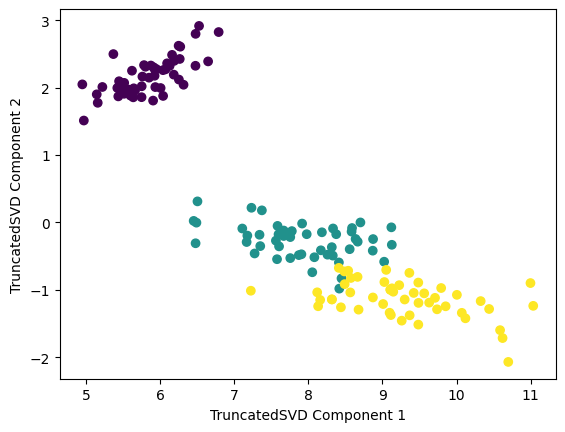

In [34]:
from sklearn.decomposition import TruncatedSVD, PCA
from sklearn.datasets import load_iris
import matplotlib.pyplot as plt
import warnings
warnings.filterwarnings('ignore')
%matplotlib inline

iris = load_iris()
iris_ftrs = iris.data
# 2개의 주요 component로 TruncatedSVD 변환
tsvd = TruncatedSVD(n_components = 2)
tsvd.fit(iris_ftrs)
iris_tsvd = tsvd.transform(iris_ftrs)

# Scatter plot 2차원으로 TruncatedSVD 변환 된 데이터 표현. 품종은 색깔로 구분
plt.scatter(x = iris_tsvd[:,0], y = iris_tsvd[:,1], c = iris.target)
plt.xlabel('TruncatedSVD Component 1')
plt.ylabel('TruncatedSVD Component 2')

Text(0.5, 1.0, 'PCA Transformed')

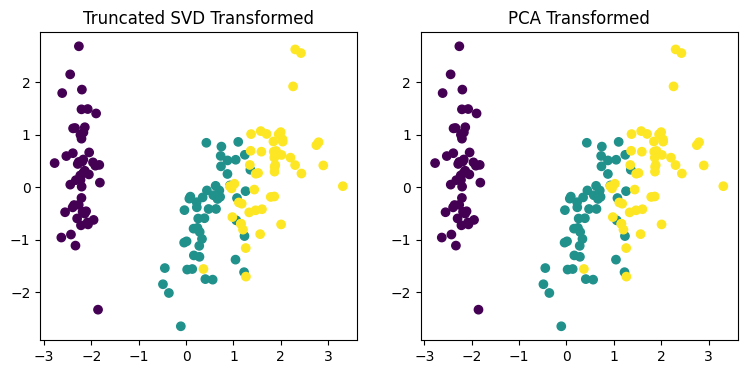

In [35]:
from sklearn.preprocessing import StandardScaler
# 붓꽃 데이터를 StandardScaler로 변환
scaler = StandardScaler()
iris_scaled = scaler.fit_transform(iris_ftrs)

# 스케일링된 데이터를 기반으로 TruncatedSVD 변환 수행
tsvd=TruncatedSVD(n_components = 2)
tsvd.fit(iris_scaled)
iris_tsvd = tsvd.transform(iris_scaled)

# 스케일링된 데이터를 기반으로 PCA 변환 수행
pca = PCA(n_components=2)
pca.fit(iris_scaled)
iris_pca = pca.transform(iris_scaled)

# TruncatedSVD 변환 데이터를 왼쪽에, PCA변환 데이터를 오른쪽에 표현
fig, (ax1, ax2) = plt.subplots(figsize = (9,4), ncols = 2)
ax1.scatter(x = iris_tsvd[:,0], y = iris_tsvd[:, 1], c = iris.target)
ax2.scatter(x = iris_pca[:,0], y = iris_pca[:, 1], c = iris.target)
ax1.set_title('Truncated SVD Transformed')
ax2.set_title('PCA Transformed')

In [36]:
print((iris_pca - iris_tsvd).mean())
print((pca.components_ - tsvd.components_).mean()) # 주성분 Principal components

2.3364990497931616e-15
2.0816681711721685e-17


>- 밀집 행렬(Dense Matrix): 밀집 행렬은 대부분의 요소가 0이 아닌 값으로 채워진 행렬을 의미합니다. 즉, 대부분의 셀이 값을 갖고 있는 밀집한 형태의 행렬입니다.
- 희소 행렬(Sparse Matrix): 희소 행렬은 대부분의 요소가 0인 행렬을 의미합니다. 즉, 대부분의 셀이 0으로 채워진 희소한 형태의 행렬입니다.

- **PCA와 SVD의 밀집 행렬 및 희소 행렬에 대한 변환 가능성**

- PCA(Principal Component Analysis): PCA는 밀집 행렬에 대한 변환만 가능합니다. PCA는 주성분을 찾기 위해 공분산 행렬을 계산하는데, 이는 데이터의 특성 간의 상관 관계를 계산하는 데 필요합니다. 따라서 대부분의 PCA 구현은 밀집 행렬을 다루는 데 최적화되어 있습니다.

- SVD(Singular Value Decomposition): SVD는 밀집 행렬과 희소 행렬 모두에 대한 변환을 수행할 수 있습니다. SVD는 행렬을 세 개의 행렬의 곱으로 분해하는데, 이 때 희소 행렬에 대해서도 잘 동작합니다. SVD는 대표적인 행렬 분해 기법 중 하나로, 희소 행렬에 대해서도 효율적으로 작동하여 널리 사용됩니다.

- PCA는 모든 정보를 고려하여 데이터의 주요 특성을 추출하는데, 이는 데이터가 밀집되어 있을 때에만 가능합니다. 반면에 SVD는 데이터가 희소하더라도 유용한 정보를 추출할 수 있어, 어떤 데이터든 변환할 수 있는 유연한 방법이라고 할 수 있습니다.

- PCA : PCA는 데이터의 공분산 행렬을 계산하여 주요한 주성분을 추출합니다. 이 때, 데이터의 중심이 동일하다면 공분산 행렬의 값이 변하지 않습니다. 즉, 데이터의 중심이 동일해지면 PCA는 동일한 주성분을 추출합니다.
- SVD : SVD는 주어진 행렬을 세 개의 행렬의 곱으로 분해합니다. 이 때, 데이터의 중심이 동일하다면 원본 행렬의 중심을 나타내는 평균 벡터가 영벡터(0 벡터)가 되어 행렬의 중심이 제거됩니다. 따라서 데이터의 중심이 동일해지면 SVD도 동일한 변환을 수행합니다.
- 즉, 데이터의 중심이 동일해지면 PCA와 SVD는 모두 동일한 변환을 수행하여 같은 결과를 반환합니다. 이는 두 알고리즘이 데이터의 공분산 구조를 활용하여 주요한 정보를 추출하기 때문입니다. 따라서 데이터의 중심을 동일하게 조정하는 것은 PCA와 SVD에서 동일한 효과를 가져옵니다.

- 따라서 데이터의 중심이 동일해지면 PCA와 SVD는 동일한 변환을 수행하여 추출된 행렬 집합이 같습니다.

> 데이터의 중심이 동일하다는 것은 각 특성의 평균이 동일하다는 것을 의미합니다. 예를 들어, 데이터가 2차원이고 각 차원의 평균이 (0, 0)이라면 데이터의 중심은 원점(0, 0)입니다.

>이제 데이터의 중심이 동일하면 공분산 행렬의 값이 변하지 않는다는 것을 설명하겠습니다. 공분산 행렬은 각 특성 간의 관계를 나타내는데, 데이터의 중심을 원점으로 이동시켜도 각 특성 간의 관계가 변하지 않습니다.

- 예를 들어, 데이터의 각 특성이 평균이 0이라면, 각 특성의 변동 범위가 동일한 위치에 대해 있습니다. 이는 각 특성 간의 변동량이 동일한 방향으로 유지됨을 의미합니다. 따라서 중심을 원점으로 이동시켜도 각 특성 간의 상대적인 변동량이 변하지 않으므로 공분산 행렬의 값도 변하지 않습니다.

> 이러한 이유로 데이터의 중심이 동일하면 공분산 행렬의 값이 변하지 않습니다. PCA는 이러한 공분산 행렬을 기반으로 주성분을 추출하므로 데이터의 중심이 동일하면 PCA의 결과도 변하지 않습니다. **즉, 데이터의 중심을 조정하면 각 특성 간의 상대적인 변동량이 유지되므로 주성분 추출에 영향을 미치지 않습니다.**

### **data의 스케일링이 PCA와 SVD의 결과에 영향을 미치는 이유**

> 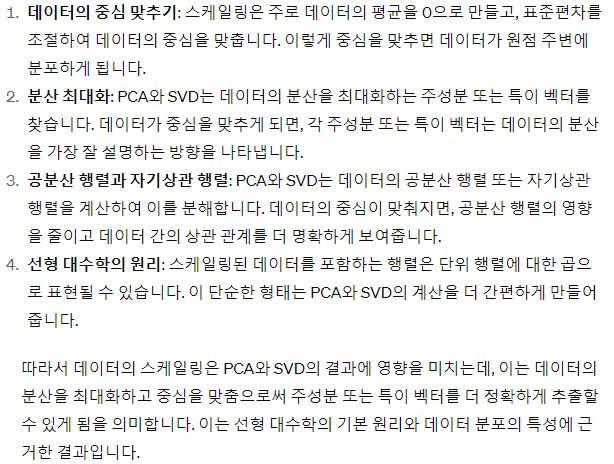

- **정방행렬에 대한 SVD(특이값 분해)를 구현하는 것은 PCA(주성분 분석)를 계산하는 것과 같습니다.**
- 정방행렬의 경우, SVD를 통해 고유벡터와 고유값을 계산하면 주성분 분석과 같은 결과를 얻을 수 있습니다. 이는 정방행렬이 자기자신의 전치 행렬과 동일하기 때문에 SVD의 결과가 PCA와 동일해지기 때문입니다.

## **NMF (Non-Negative Matrix Factorization) 음수가 아닌 행렬 분해**

>- NMF는 "Non-Negative Matrix Factorization"의 약자입니다. 이는 양수로만 이루어진 행렬을 양수로만 이루어진 두 개의 행렬로 분해하는 기술입니다. 이해를 돕기 위해 간단한 예시를 들어보겠습니다.
- 예를 들어, 우리에게 4명의 학생이 있는 수학과 과학 시험 성적을 나타내는 양수로만 이루어진 행렬이 있다고 합시다. 이 행렬은 학생들의 성적을 표현합니다. NMF는 이런 행렬을 두 개의 양수 행렬로 분해하여 더 작은 행렬들의 곱으로 표현하는 방법입니다.
- NMF를 통해 우리는 예를 들어 성적을 결정짓는 요소들을 발견할 수 있습니다. 첫 번째 양수 행렬은 "기초 개념 이해도"를 나타내고, 두 번째 양수 행렬은 "문제 해결 능력"을 나타낼 수 있습니다. 따라서, 이 두 가지 요소의 조합으로 각 학생의 성적을 설명할 수 있게 됩니다.
- 이것이 NMF의 기본 개념입니다. 이 방법을 사용하면 데이터의 패턴을 추출하거나 차원을 축소하여 데이터를 더 잘 이해하고 해석할 수 있습니다.

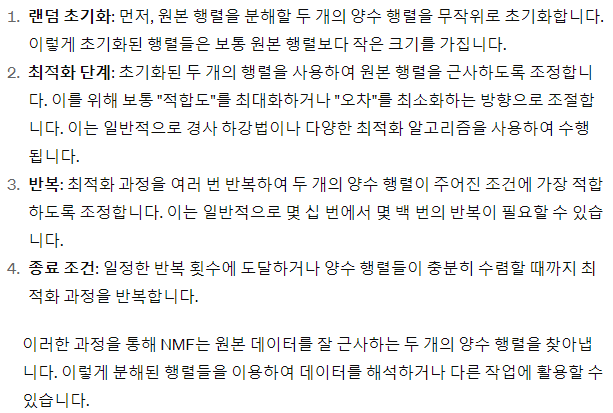

Text(0, 0.5, 'NMF Component 2')

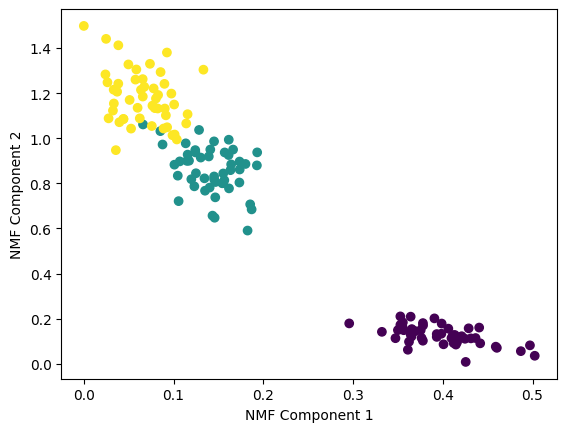

In [39]:
from sklearn.decomposition import NMF
from sklearn.datasets import load_iris
import matplotlib.pyplot as plt
%matplotlib inline

iris = load_iris()
iris_ftrs = iris.data
nmf = NMF(n_components = 2) # NMF에서 생성되는 행렬의 개수를 지정
nmf.fit(iris_ftrs)
iris_nmf = nmf.transform(iris_ftrs)
plt.scatter(x = iris_nmf[:,0], y = iris_nmf[:,1], c = iris.target)
plt.xlabel('NMF Component 1')
plt.ylabel('NMF Component 2')

>- 텍스트 문서는 단어의 빈도를 나타내는 행렬로 표현할 수 있습니다. 이런 경우 NMF를 적용하면 문서의 주제를 나타내는 잠재 요소를 발견할 수 있습니다.
- 예를 들어, 여러 개의 뉴스 기사가 있는 데이터셋을 가정해봅시다. 이 데이터를 단어 빈도 행렬로 표현하면 행은 기사를 나타내고 열은 각 단어를 나타냅니다. NMF를 적용하면 기사를 설명하는 주제별로 단어들이 그룹화될 수 있습니다.
- 이렇게 하면 우리는 각 주제가 어떤 단어들로 이루어져 있는지를 알 수 있습니다. 이 예시에서는 주제별로 관련된 단어들이 모여있을 것이며, 이를 통해 데이터셋에서 어떤 주제들이 다루어지고 있는지를 파악할 수 있습니다.
- 이렇게 NMF를 사용하면 데이터의 구조를 더 잘 이해하고, 잠재적인 패턴이나 특징을 발견할 수 있습니다.

> #### **차원 축소는 단순히 data의 feature의 개수를 줄이는 개념보다는 이를 통해 data를 잘 설명할 수 있는 잠재적인 요소를 추출하는 데 큰 의미가 있다**